## Task 2 Movie rating prediction

In [6]:
movie = pd.read_csv('C:\\Users\\mincy\\Desktop\\codesoft\\movieprediction.csv',encoding='latin-1')
movie.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [7]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [8]:
movie.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [9]:
movie.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [10]:
# There are many missing values in the rating variable. 
# Our aim is to predict rating of a movie so let's remove missing values from this variable.
movie.dropna(subset=['Rating'], inplace=True)

In [12]:
movie.isnull().sum()

Name           0
Year           0
Duration    2068
Genre        102
Rating         0
Votes          0
Director       5
Actor 1      125
Actor 2      200
Actor 3      292
dtype: int64

In [15]:
(round(movie.isnull().sum()/movie.isnull().count(), 4)*100)

Name         0.00
Year         0.00
Duration    26.11
Genre        1.29
Rating       0.00
Votes        0.00
Director     0.06
Actor 1      1.58
Actor 2      2.53
Actor 3      3.69
dtype: float64

In [18]:
# Only 'Duration' has many missing values.
# Hence we can remove other missing values.
movie.dropna(subset=['Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre'], inplace=True)

In [19]:
(round(movie.isnull().sum()/movie.isnull().count(), 4)*100)

Name         0.00
Year         0.00
Duration    25.13
Genre        0.00
Rating       0.00
Votes        0.00
Director     0.00
Actor 1      0.00
Actor 2      0.00
Actor 3      0.00
dtype: float64

In [20]:
# Impute missing values in duration with the mean.
movie['Duration'] = pd.to_numeric(movie['Duration'].str.strip(' min'))
movie['Duration'].fillna(movie['Duration'].mean(), inplace=True)

movie.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [21]:
movie.drop_duplicates(inplace=True)
movie.shape

(7558, 10)

In [24]:
movie['Year'] = movie['Year'].apply(lambda x: x.split(')')[0])

year_list = []
for val in movie['Year']:
    if len(val.split('(')) == 1:
        year_list.append(val.split('(')[0])
    elif len(val.split('(')) > 1:
        year_list.append(val.split('(')[1])
movie['Year'] = year_list
movie['Votes'] = movie['Votes'].str.replace(',', '').astype(int)
movie['Year'] = movie['Year'].astype(int)
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7558 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7558 non-null   object 
 1   Year      7558 non-null   int32  
 2   Duration  7558 non-null   float64
 3   Genre     7558 non-null   object 
 4   Rating    7558 non-null   float64
 5   Votes     7558 non-null   int32  
 6   Director  7558 non-null   object 
 7   Actor 1   7558 non-null   object 
 8   Actor 2   7558 non-null   object 
 9   Actor 3   7558 non-null   object 
dtypes: float64(2), int32(2), object(6)
memory usage: 590.5+ KB


In [25]:
movie[['Rating', 'Duration', 'Votes']].describe(percentiles=[0.75,0.8, 0.9, 0.95, 0.98])

,Rating,Duration,Votes
count,7558.000000,7558.000000,7558.000000
mean,5.811127,133.439124,2029.123842
std,1.368255,21.908841,11868.695754
min,1.100000,21.000000,5.000000
50%,6.000000,133.439124,61.000000
75%,6.800000,144.000000,456.000000
80%,7.000000,149.000000,797.600000
90%,7.400000,160.000000,3182.900000
95%,7.800000,169.000000,8662.150000
98%,8.200000,180.000000,21935.900000


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

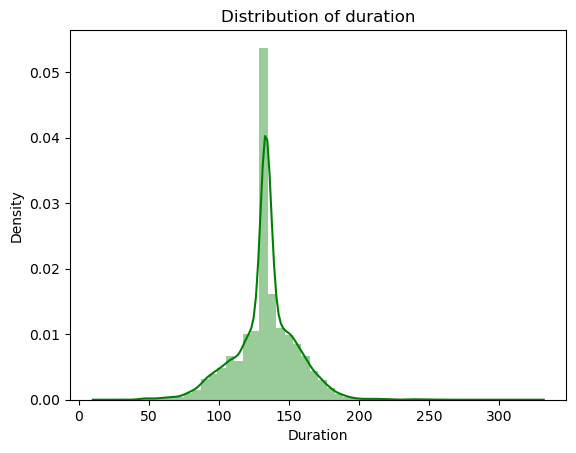

In [33]:
sns.distplot(movie['Duration'],color='green')
plt.title('Distribution of duration')
plt.show()

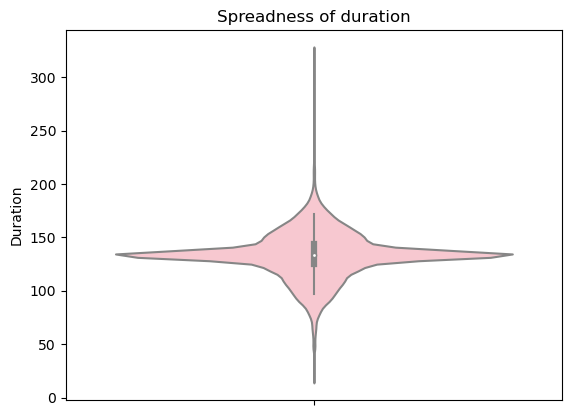

In [35]:
sns.violinplot(y=movie['Duration'], color='pink')
plt.title('Spreadness of duration')
plt.show()

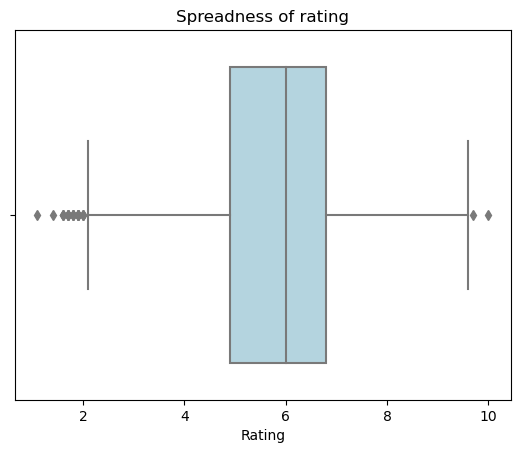

In [37]:
sns.boxplot(x=movie['Rating'],color='lightblue')
plt.title('Spreadness of rating')
plt.show()

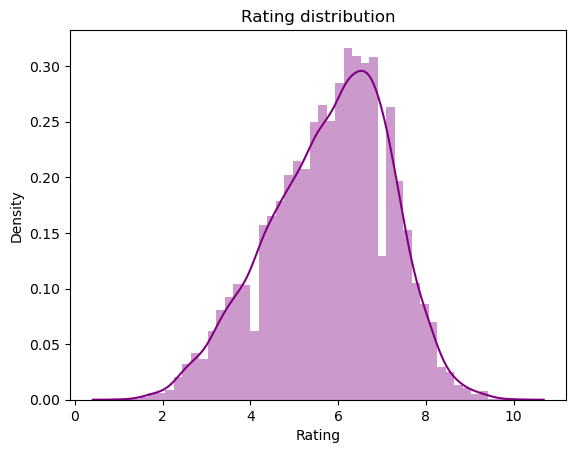

In [39]:
sns.distplot(movie['Rating'],color='purple')
plt.title('Rating distribution')
plt.show()

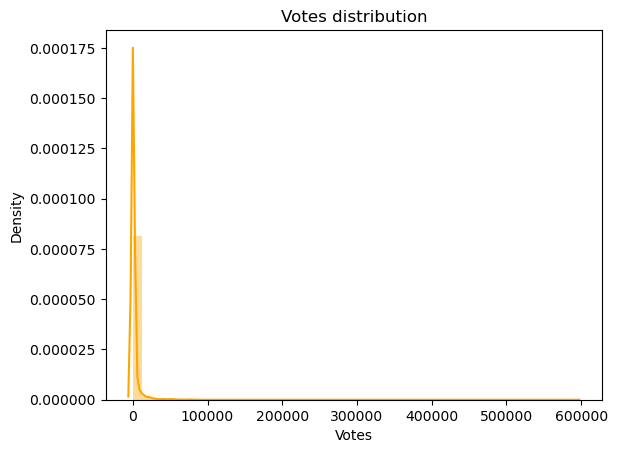

In [40]:
sns.distplot(movie['Votes'],color='orange')
plt.title('Votes distribution')
plt.show()

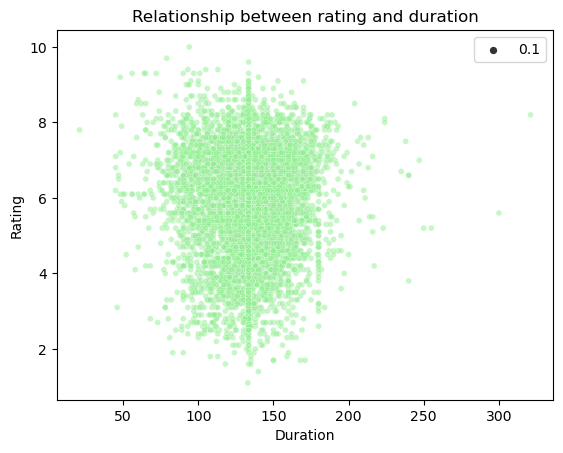

In [42]:
sns.scatterplot(data=movie, x='Duration', y='Rating', size=0.1, alpha=0.5,color='lightgreen')
plt.title('Relationship between rating and duration')
plt.show()

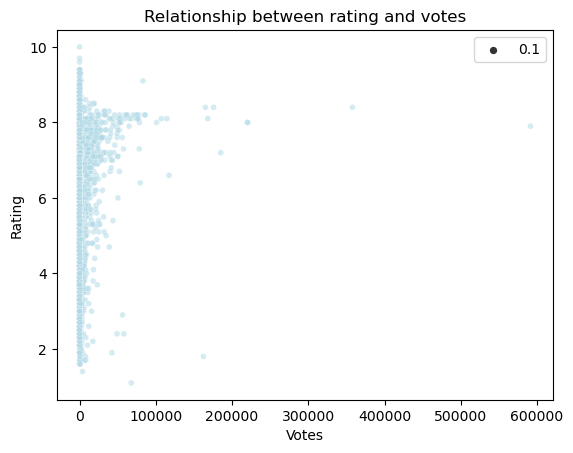

In [48]:
sns.scatterplot(data=movie, x='Votes', y='Rating', size=0.1, alpha=0.5,color='lightblue')
plt.title('Relationship between rating and votes')
plt.show()

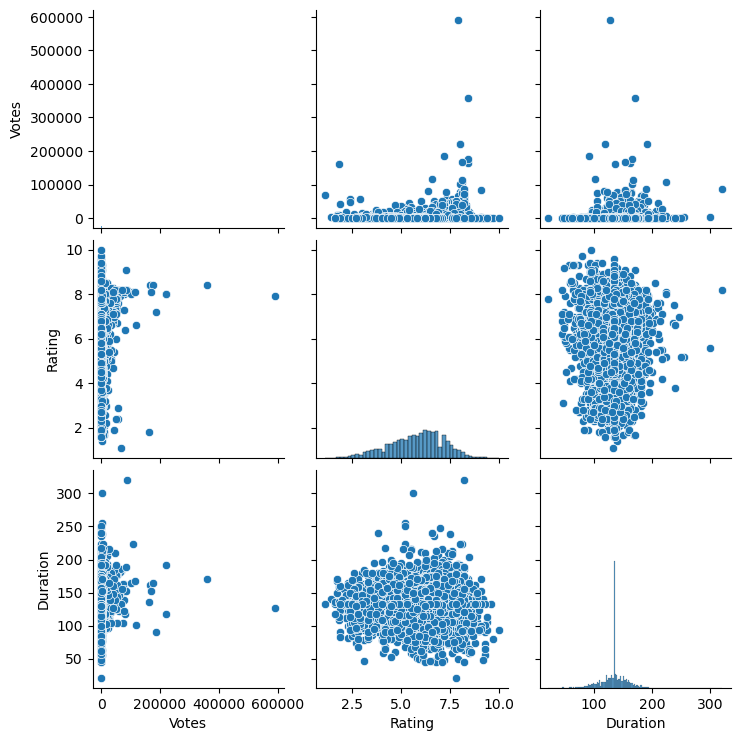

In [51]:
sns.pairplot(movie[['Votes', 'Rating', 'Duration']]);

In [52]:
movie_update = movie.drop(['Name'], axis=1)

In [54]:
movie_update.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7558 entries, 1 to 15508
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      7558 non-null   int32  
 1   Duration  7558 non-null   float64
 2   Genre     7558 non-null   object 
 3   Rating    7558 non-null   float64
 4   Votes     7558 non-null   int32  
 5   Director  7558 non-null   object 
 6   Actor 1   7558 non-null   object 
 7   Actor 2   7558 non-null   object 
 8   Actor 3   7558 non-null   object 
dtypes: float64(2), int32(2), object(5)
memory usage: 531.4+ KB


In [55]:
# target encoding
actor1_encoding_map = movie_update.groupby('Actor 1').agg({'Rating': 'mean'}).to_dict()
actor2_encoding_map = movie_update.groupby('Actor 2').agg({'Rating': 'mean'}).to_dict()
actor3_encoding_map = movie_update.groupby('Actor 3').agg({'Rating': 'mean'}).to_dict()
director_encoding_map = movie_update.groupby('Director').agg({'Rating': 'mean'}).to_dict()
genre_encoding_map = movie_update.groupby('Genre').agg({'Rating': 'mean'}).to_dict()

In [56]:
movie_update['actor1_encoded'] = round(movie_update['Actor 1'].map(actor1_encoding_map['Rating']),1)
movie_update['actor2_encoded'] = round(movie_update['Actor 2'].map(actor2_encoding_map['Rating']),1)
movie_update['actor3_encoded'] = round(movie_update['Actor 3'].map(actor3_encoding_map['Rating']),1)
movie_update['director_encoded'] = round(movie_update['Director'].map(director_encoding_map['Rating']),1)
movie_update['genre_encoded'] = round(movie_update['Genre'].map(genre_encoding_map['Rating']),1)

In [57]:
movie_update.drop(['Actor 1', 'Actor 2', 'Actor 3', 'Director', 'Genre'], axis=1, inplace=True)
movie_update.head()

,Year,Duration,Rating,Votes,actor1_encoded,actor2_encoded,actor3_encoded,director_encoded,genre_encoded
1,2019,109.0,7.0,8,6.8,7.0,7.0,7.0,6.3
3,2019,110.0,4.4,35,5.4,4.4,4.4,4.4,5.7
5,1997,147.0,4.7,827,4.8,5.8,5.8,5.4,6.2
6,2005,142.0,7.4,1086,5.3,6.0,6.5,7.5,6.8
8,2012,82.0,5.6,326,5.6,5.9,5.6,5.6,5.5


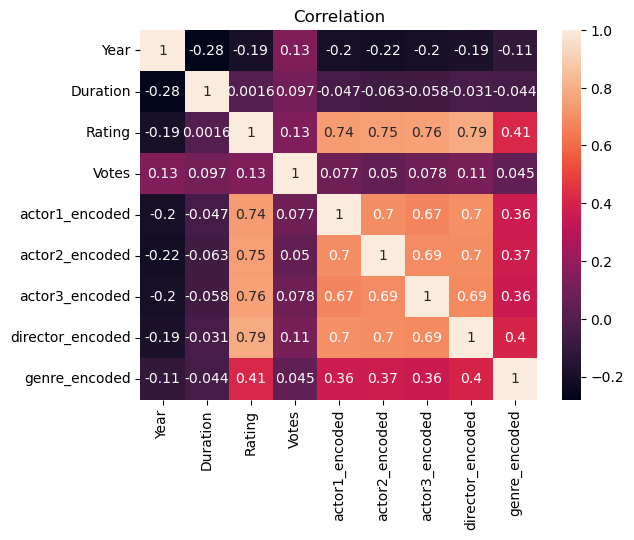

In [58]:
sns.heatmap(movie_update.corr(), annot=True)
plt.title('Correlation')
plt.show()

In [59]:
# splitting of data
X = movie_update.drop('Rating', axis=1)
y = movie_update['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [60]:
# Model training and evaluation
reg = LinearRegression()
reg.fit(X_train, y_train)
# Evaluate the model performance on the training data
print('Coefficient of determination: ', reg.score(X_train, y_train))

Coefficient of determination:  0.758194854431707


In [61]:
y_pred = reg.predict(X_test)

print('R^2: ', r2_score(y_test, y_pred))
print('MAE: ',mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))

R^2:  0.7699319510731653
MAE:  0.5003359707860067
MSE:  0.4447096200703634
RMSE:  0.6668655187294987


#### Conclusion
#### We got less error values here. Hence this regression model is good to predict movie rating for this dataset.